In [1]:
%matplotlib inline 

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def periodic(coords, vecs):
    # Centre
    initial = coords
    # Positions middle
    left = initial.copy()
    left['X'] = left['X'] - vecs.iloc[0, 0]
    left['Y'] = left['Y'] - vecs.iloc[0, 1]
    left['Z'] = left['Z'] - vecs.iloc[0, 2]

    right = initial.copy()
    right['X'] = right['X'] + vecs.iloc[0, 0]
    right['Y'] = right['Y'] + vecs.iloc[0, 1]
    right['Z'] = right['Z'] + vecs.iloc[0, 2]

    front = initial.copy()
    front['X'] = front['X'] - vecs.iloc[2, 0]
    front['Y'] = front['Y'] - vecs.iloc[2, 1]
    front['Z'] = front['Z'] - vecs.iloc[2, 2]

    lfront = front.copy()
    lfront['X'] = lfront['X'] - vecs.iloc[0, 0]
    lfront['Y'] = lfront['Y'] - vecs.iloc[0, 1]
    lfront['Z'] = lfront['Z'] - vecs.iloc[0, 2]

    rfront = front.copy()
    rfront['X'] = rfront['X'] + vecs.iloc[0, 0]
    rfront['Y'] = rfront['Y'] + vecs.iloc[0, 1]
    rfront['Z'] = rfront['Z'] + vecs.iloc[0, 2]

    back = initial.copy()
    back['X'] = back['X'] + vecs.iloc[2, 0]
    back['Y'] = back['Y'] + vecs.iloc[2, 1]
    back['Z'] = back['Z'] + vecs.iloc[2, 2]

    lback = back.copy()
    lback['X'] = lback['X'] - vecs.iloc[0, 0]
    lback['Y'] = lback['Y'] - vecs.iloc[0, 1]
    lback['Z'] = lback['Z'] - vecs.iloc[0, 2]

    rback = back.copy()
    rback['X'] = rback['X'] + vecs.iloc[0, 0]
    rback['Y'] = rback['Y'] + vecs.iloc[0, 1]
    rback['Z'] = rback['Z'] + vecs.iloc[0, 2]

    # Top row
    up = initial.copy()
    up['X'] = up['X'] + vecs.iloc[1, 0]
    up['Y'] = up['Y'] + vecs.iloc[1, 1]
    up['Z'] = up['Z'] + vecs.iloc[1, 2]

    upleft = up.copy()
    upleft['X'] = upleft['X'] - vecs.iloc[0, 0]
    upleft['Y'] = upleft['Y'] - vecs.iloc[0, 1]
    upleft['Z'] = upleft['Z'] - vecs.iloc[0, 2]

    upright = up.copy()
    upright['X'] = upright['X'] + vecs.iloc[0, 0]
    upright['Y'] = upright['Y'] + vecs.iloc[0, 1]
    upright['Z'] = upright['Z'] + vecs.iloc[0, 2]

    upfront = up.copy()
    upfront['X'] = upfront['X'] - vecs.iloc[2, 0]
    upfront['Y'] = upfront['Y'] - vecs.iloc[2, 1]
    upfront['Z'] = upfront['Z'] - vecs.iloc[2, 2]

    uplfront = upfront.copy()
    uplfront['X'] = uplfront['X'] - vecs.iloc[0, 0]
    uplfront['Y'] = uplfront['Y'] - vecs.iloc[0, 1]
    uplfront['Z'] = uplfront['Z'] - vecs.iloc[0, 2]

    uprfront = upfront.copy()
    uprfront['X'] = uprfront['X'] + vecs.iloc[0, 0]
    uprfront['Y'] = uprfront['Y'] + vecs.iloc[0, 1]
    uprfront['Z'] = uprfront['Z'] + vecs.iloc[0, 2]

    upback = up.copy()
    upback['X'] = upback['X'] + vecs.iloc[2, 0]
    upback['Y'] = upback['Y'] + vecs.iloc[2, 1]
    upback['Z'] = upback['Z'] + vecs.iloc[2, 2]

    uplback = upback.copy()
    uplback['X'] = uplback['X'] - vecs.iloc[0, 0]
    uplback['Y'] = uplback['Y'] - vecs.iloc[0, 1]
    uplback['Z'] = uplback['Z'] - vecs.iloc[0, 2]

    uprback = upback.copy()
    uprback['X'] = uprback['X'] + vecs.iloc[0, 0]
    uprback['Y'] = uprback['Y'] + vecs.iloc[0, 1]
    uprback['Z'] = uprback['Z'] + vecs.iloc[0, 2]

    # Bottom row
    down = initial.copy()
    down['X'] = down['X'] - vecs.iloc[1, 0]
    down['Y'] = down['Y'] - vecs.iloc[1, 1]
    down['Z'] = down['Z'] - vecs.iloc[1, 2]

    downleft = down.copy()
    downleft['X'] = downleft['X'] - vecs.iloc[0, 0]
    downleft['Y'] = downleft['Y'] - vecs.iloc[0, 1]
    downleft['Z'] = downleft['Z'] - vecs.iloc[0, 2]

    downright = down.copy()
    downright['X'] = downright['X'] + vecs.iloc[0, 0]
    downright['Y'] = downright['Y'] + vecs.iloc[0, 1]
    downright['Z'] = downright['Z'] + vecs.iloc[0, 2]

    downfront = down.copy()
    downfront['X'] = downfront['X'] - vecs.iloc[2, 0]
    downfront['Y'] = downfront['Y'] - vecs.iloc[2, 1]
    downfront['Z'] = downfront['Z'] - vecs.iloc[2, 2]

    downlfront = downfront.copy()
    downlfront['X'] = downlfront['X'] - vecs.iloc[0, 0]
    downlfront['Y'] = downlfront['Y'] - vecs.iloc[0, 1]
    downlfront['Z'] = downlfront['Z'] - vecs.iloc[0, 2]

    downrfront = downfront.copy()
    downrfront['X'] = downrfront['X'] + vecs.iloc[0, 0]
    downrfront['Y'] = downrfront['Y'] + vecs.iloc[0, 1]
    downrfront['Z'] = downrfront['Z'] + vecs.iloc[0, 2]

    downback = down.copy()
    downback['X'] = downback['X'] + vecs.iloc[2, 0]
    downback['Y'] = downback['Y'] + vecs.iloc[2, 1]
    downback['Z'] = downback['Z'] + vecs.iloc[2, 2]

    downlback = downback.copy()
    downlback['X'] = downlback['X'] - vecs.iloc[0, 0]
    downlback['Y'] = downlback['Y'] - vecs.iloc[0, 1]
    downlback['Z'] = downlback['Z'] - vecs.iloc[0, 2]

    downrback = downback.copy()
    downrback['X'] = downrback['X'] + vecs.iloc[0, 0]
    downrback['Y'] = downrback['Y'] + vecs.iloc[0, 1]
    downrback['Z'] = downrback['Z'] + vecs.iloc[0, 2]

    super_cell = pd.concat([uplfront, upfront, uprfront, upleft, up, upright, uplback, upback, uprback,
                            lfront, front, rfront, left, initial, right, lback, back, rback,
                            downlfront, downfront, downrfront, downleft, down, downright, downlback, downback,
                            downrback],
                           axis=0, ignore_index=True)

    return super_cell

In [4]:
meta = pd.read_csv("jmol_xyz.mol",
                   delim_whitespace=True,
                   skiprows=5,
                   header=None,
                   nrows=1,
                   names=['A', 'B', 'C', 'Atoms', 'Bonds', 'D', 'E', 'F'])
meta = meta.drop(labels=['A', 'B', 'C', 'D', 'E', 'F'],
                 axis=1)

In [5]:
xyz_atoms = pd.read_csv("jmol_xyz.mol",
                        delim_whitespace=True,
                        skiprows=7,
                        header=None,
                        names=['A', 'B', 'C', 'Atom', 'X', 'Y', 'Z', 'D', 'E', 'F', 'G', 'H'],
                        nrows=meta.iloc[0, 0])
xyz_atoms = xyz_atoms.drop(labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
                           axis=1)

In [6]:
xyz_bonds = pd.read_csv("jmol_xyz.mol",
                        delim_whitespace=True,
                        skiprows=7 + meta.iloc[0, 0] + 2,
                        header=None,
                        names=['A', 'B', 'C', 'D', 'Atom1', 'Atom2'],
                        nrows=meta.iloc[0, 1],
                        engine='python')
xyz_bonds = xyz_bonds.drop(labels=['A', 'B', 'C', 'D'],
                           axis=1)

In [7]:
meta

,Atoms,Bonds
0,6858,5895


In [8]:
xyz_atoms.head(10)

,Atom,X,Y,Z
0,O,19.33194,26.15457,32.62148
1,O,17.79920,20.15763,32.41217
2,N,20.00595,20.58139,32.51487
3,C,19.93230,22.00822,32.51547
4,C,18.96119,22.57193,33.30581
5,C,18.75888,23.93910,33.37109
6,C,19.53282,24.80804,32.53978
7,C,20.43381,24.25940,31.64136
8,C,20.73412,22.85062,31.71175
9,C,18.96849,19.74722,32.39566


In [9]:
xyz_bonds.head(10)

,Atom1,Atom2
0,1,7
1,1,16
2,2,10
3,3,17
4,4,3
5,4,9
6,5,4
7,6,5
8,6,7
9,7,8


In [10]:
vectors = pd.DataFrame([[35.4138000000, 0.0000000000, 0.0000000000],
                        [-1.7972342519, 39.7604017842, 0.0000000000],
                        [-5.7341619914, -2.8978936073, 50.9504135813]],
                       columns=['a', 'b', 'c'])

In [11]:
vectors

,a,b,c
0,35.413800,0.000000,0.000000
1,-1.797234,39.760402,0.000000
2,-5.734162,-2.897894,50.950414


In [12]:
fig1 = plt.figure()

In [13]:
ax = fig1.add_subplot(111, projection='3d')

In [14]:
ax.scatter(
    xyz_atoms.X, xyz_atoms.Y, xyz_atoms.Z,
    marker='o',
    color='b'
)

In [15]:
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Text(0.5,0,'Z')

In [16]:
plt.show()

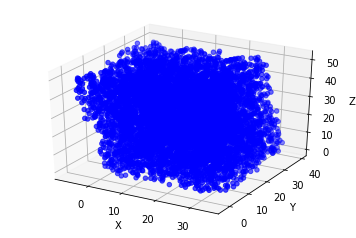

In [17]:
fig1

In [18]:
big_xyz = periodic(xyz_atoms, vectors)

In [19]:
big_meta = pd.read_csv("jmol_big_xyz.mol", 
                       delim_whitespace=True, skiprows=5, header=None, nrows=1,
                       names=['A', 'B', 'C', 'Atoms', 'Bonds', 'D', 'E', 'F'])
big_meta = big_meta.drop(labels=['A', 'B', 'C', 'D', 'E', 'F'], axis=1)

In [20]:
big_xyz_atom = pd.read_csv("jmol_big_xyz.mol", 
                           delim_whitespace=True, skiprows=7, header=None,
                           names=['A', 'B', 'C', 'Atom', 'X', 'Y', 'Z', 'D', 'E', 'F', 'G', 'H'],
                           nrows=big_meta.iloc[0, 0])
big_xyz_atom = big_xyz_atom.drop(labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], axis=1)

In [21]:
big_xyz_bonds = pd.read_csv("jmol_big_xyz.mol", 
                            delim_whitespace=True, skiprows=7 + big_meta.iloc[0, 0] + 2, header=None,
                            names=['A', 'B', 'C', 'D', 'Atom1', 'Atom2'],
                            nrows=big_meta.iloc[0, 1], engine='python')
big_xyz_bonds = big_xyz_bonds.drop(labels=['A', 'B', 'C', 'D'], axis=1)

In [22]:
big_xyz_bonds.head(10)

,Atom1,Atom2
0,1,7
1,1,16
2,2,10
3,3,17
4,4,3
5,4,9
6,5,4
7,6,5
8,6,7
9,7,8


In [23]:
bonds = big_xyz_bonds.merge(big_xyz_atom,
                            how='left',
                            left_on='Atom1',
                            right_index=True)
bonds = bonds.drop(['X', 'Y', 'Z'],
                   axis=1)
bonds = bonds.merge(big_xyz_atom,
                    how='left',
                    left_on='Atom2',
                    right_index=True)
bonds = bonds.drop(['X', 'Y', 'Z'],
                   axis=1)
bonds.columns = ['Atom1', 'Atom2', 'Atom1Name', 'Atom2Name']

In [24]:
bonds.head(10)

,Atom1,Atom2,Atom1Name,Atom2Name
0,1,7,O,C
1,1,16,O,H
2,2,10,N,C
3,3,17,C,H
4,4,3,C,C
5,4,9,C,C
6,5,4,C,C
7,6,5,C,C
8,6,7,C,C
9,7,8,C,C


In [25]:
G = nx.from_pandas_edgelist(
    big_xyz_bonds,
    source='Atom1',
    target='Atom2'
)

In [26]:
molecules = list(G.subgraph(c) for c in nx.connected_components(G))
molslist = []

In [27]:
molecules

 ...]

In [28]:
for molecule in range(len(molecules)):
    molslist.append((molecule, list(molecules[molecule].nodes)))

In [29]:
molslist

[(0, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 (1, [21, 22, 23, 24, 25, 26, 27, 28, 29]),
 (2, [32, 33, 34, 35, 36, 37, 38, 30, 31]),
 (3, [39, 40, 41, 42, 43, 44, 45, 46, 47]),
 (4, [48, 49, 50, 51, 52, 53, 54, 55, 56]),
 (5, [64, 65, 57, 58, 59, 60, 61, 62, 63]),
 (6, [66, 67, 68, 69, 70, 71, 72, 73, 74]),
 (7, [75, 76, 77, 78, 79, 80, 81, 82, 83]),
 (8, [84, 85, 86, 87, 88, 89, 90, 91, 92]),
 (9, [96, 97, 98, 99, 100, 101, 93, 94, 95]),
 (10, [102, 103, 104, 105, 106, 107, 108, 109, 110]),
 (11, [111, 112, 113, 114, 115, 116, 117, 118, 119]),
 (12, [128, 120, 121, 122, 123, 124, 125, 126, 127]),
 (13, [129, 130, 131, 132, 133, 134, 135, 136, 137]),
 (14, [138, 139, 140, 141, 142, 143, 144, 145, 146]),
 (15, [147, 148, 149, 150, 151, 152, 153, 154, 155]),
 (16, [160, 161, 162, 163, 164, 156, 157, 158, 159]),
 (17, [165, 166, 167, 168, 169, 170, 171, 172, 173]),
 (18, [174, 175, 176, 177, 178, 179, 180, 181, 182]),
 (19, [183, 184, 185, 186, 187, 188, 

In [30]:
slist = []
for i, n in molslist:
    molseries = pd.Series(data=i,
                          name='MOL',
                          index=n)
    slist.append(molseries)

In [31]:
slist

[1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 17    0
 18    0
 19    0
 20    0
 Name: MOL, dtype: int64, 21    1
 22    1
 23    1
 24    1
 25    1
 26    1
 27    1
 28    1
 29    1
 Name: MOL, dtype: int64, 32    2
 33    2
 34    2
 35    2
 36    2
 37    2
 38    2
 30    2
 31    2
 Name: MOL, dtype: int64, 39    3
 40    3
 41    3
 42    3
 43    3
 44    3
 45    3
 46    3
 47    3
 Name: MOL, dtype: int64, 48    4
 49    4
 50    4
 51    4
 52    4
 53    4
 54    4
 55    4
 56    4
 Name: MOL, dtype: int64, 64    5
 65    5
 57    5
 58    5
 59    5
 60    5
 61    5
 62    5
 63    5
 Name: MOL, dtype: int64, 66    6
 67    6
 68    6
 69    6
 70    6
 71    6
 72    6
 73    6
 74    6
 Name: MOL, dtype: int64, 75    7
 76    7
 77    7
 78    7
 79    7
 80    7
 81    7
 82    7
 83    7
 Name: MOL, dtype: int64, 84    8
 85    8
 86    8
 87    8
 88    8
 89    8

In [32]:
molsdf = pd.concat(slist)

In [33]:
molsdf

1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            1
22            1
23            1
24            1
25            1
26            1
27            1
28            1
29            1
32            2
          ...  
185137    20336
185138    20336
185139    20336
185140    20337
185141    20337
185142    20337
185143    20337
185144    20337
185145    20337
185146    20337
185147    20337
185148    20337
185152    20338
185153    20338
185154    20338
185155    20338
185156    20338
185157    20338
185149    20338
185150    20338
185151    20338
185158    20339
185159    20339
185160    20339
185161    20339
185162    20339
185163    20339
185164    20339
185165    20339
185166    20339
Name: MOL, Length: 18356

In [34]:
molsdf = molsdf.to_frame(name='MOL')

In [35]:
molsdf

,MOL
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,0


In [37]:
print('molsdf= ', len(molsdf))
print('big_xyz_atom= ', len(big_xyz_atom))

molsdf=  183567
big_xyz_atom=  185166


In [38]:
print('missing= ', len(big_xyz_atom) - len(molsdf))

missing=  1599


In [39]:
big_xyz_atom = big_xyz_atom.merge(molsdf,
                                  right_index=True,
                                  left_index=True,
                                  how='left')

In [40]:
big_xyz_atom.head(50)

,Atom,X,Y,Z,MOL
0,O,-12.14493,68.81287,-18.32893,NaN
1,O,-13.67767,62.81593,-18.53824,0.0
2,N,-11.47092,63.23969,-18.43554,0.0
3,C,-11.54457,64.66651,-18.43494,0.0
4,C,-12.51568,65.23023,-17.64460,0.0
5,C,-12.71799,66.59740,-17.57932,0.0
6,C,-11.94405,67.46634,-18.41063,0.0
7,C,-11.04306,66.91769,-19.30905,0.0
8,C,-10.74275,65.50892,-19.23866,0.0
9,C,-12.50838,62.40551,-18.55475,0.0


In [41]:
big_xyz_bonds['Atom1'] = big_xyz_bonds['Atom1'] - 1
big_xyz_bonds['Atom2'] = big_xyz_bonds['Atom2'] - 1

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def periodic(coords, vecs):
    # Centre
    initial = coords
    # Positions middle
    left = initial.copy()
    left['X'] = left['X'] - vecs.iloc[0, 0]
    left['Y'] = left['Y'] - vecs.iloc[0, 1]
    left['Z'] = left['Z'] - vecs.iloc[0, 2]

    right = initial.copy()
    right['X'] = right['X'] + vecs.iloc[0, 0]
    right['Y'] = right['Y'] + vecs.iloc[0, 1]
    right['Z'] = right['Z'] + vecs.iloc[0, 2]

    front = initial.copy()
    front['X'] = front['X'] - vecs.iloc[2, 0]
    front['Y'] = front['Y'] - vecs.iloc[2, 1]
    front['Z'] = front['Z'] - vecs.iloc[2, 2]

    lfront = front.copy()
    lfront['X'] = lfront['X'] - vecs.iloc[0, 0]
    lfront['Y'] = lfront['Y'] - vecs.iloc[0, 1]
    lfront['Z'] = lfront['Z'] - vecs.iloc[0, 2]

    rfront = front.copy()
    rfront['X'] = rfront['X'] + vecs.iloc[0, 0]
    rfront['Y'] = rfront['Y'] + vecs.iloc[0, 1]
    rfront['Z'] = rfront['Z'] + vecs.iloc[0, 2]

    back = initial.copy()
    back['X'] = back['X'] + vecs.iloc[2, 0]
    back['Y'] = back['Y'] + vecs.iloc[2, 1]
    back['Z'] = back['Z'] + vecs.iloc[2, 2]

    lback = back.copy()
    lback['X'] = lback['X'] - vecs.iloc[0, 0]
    lback['Y'] = lback['Y'] - vecs.iloc[0, 1]
    lback['Z'] = lback['Z'] - vecs.iloc[0, 2]

    rback = back.copy()
    rback['X'] = rback['X'] + vecs.iloc[0, 0]
    rback['Y'] = rback['Y'] + vecs.iloc[0, 1]
    rback['Z'] = rback['Z'] + vecs.iloc[0, 2]

    # Top row
    up = initial.copy()
    up['X'] = up['X'] + vecs.iloc[1, 0]
    up['Y'] = up['Y'] + vecs.iloc[1, 1]
    up['Z'] = up['Z'] + vecs.iloc[1, 2]

    upleft = up.copy()
    upleft['X'] = upleft['X'] - vecs.iloc[0, 0]
    upleft['Y'] = upleft['Y'] - vecs.iloc[0, 1]
    upleft['Z'] = upleft['Z'] - vecs.iloc[0, 2]

    upright = up.copy()
    upright['X'] = upright['X'] + vecs.iloc[0, 0]
    upright['Y'] = upright['Y'] + vecs.iloc[0, 1]
    upright['Z'] = upright['Z'] + vecs.iloc[0, 2]

    upfront = up.copy()
    upfront['X'] = upfront['X'] - vecs.iloc[2, 0]
    upfront['Y'] = upfront['Y'] - vecs.iloc[2, 1]
    upfront['Z'] = upfront['Z'] - vecs.iloc[2, 2]

    uplfront = upfront.copy()
    uplfront['X'] = uplfront['X'] - vecs.iloc[0, 0]
    uplfront['Y'] = uplfront['Y'] - vecs.iloc[0, 1]
    uplfront['Z'] = uplfront['Z'] - vecs.iloc[0, 2]

    uprfront = upfront.copy()
    uprfront['X'] = uprfront['X'] + vecs.iloc[0, 0]
    uprfront['Y'] = uprfront['Y'] + vecs.iloc[0, 1]
    uprfront['Z'] = uprfront['Z'] + vecs.iloc[0, 2]

    upback = up.copy()
    upback['X'] = upback['X'] + vecs.iloc[2, 0]
    upback['Y'] = upback['Y'] + vecs.iloc[2, 1]
    upback['Z'] = upback['Z'] + vecs.iloc[2, 2]

    uplback = upback.copy()
    uplback['X'] = uplback['X'] - vecs.iloc[0, 0]
    uplback['Y'] = uplback['Y'] - vecs.iloc[0, 1]
    uplback['Z'] = uplback['Z'] - vecs.iloc[0, 2]

    uprback = upback.copy()
    uprback['X'] = uprback['X'] + vecs.iloc[0, 0]
    uprback['Y'] = uprback['Y'] + vecs.iloc[0, 1]
    uprback['Z'] = uprback['Z'] + vecs.iloc[0, 2]

    # Bottom row
    down = initial.copy()
    down['X'] = down['X'] - vecs.iloc[1, 0]
    down['Y'] = down['Y'] - vecs.iloc[1, 1]
    down['Z'] = down['Z'] - vecs.iloc[1, 2]

    downleft = down.copy()
    downleft['X'] = downleft['X'] - vecs.iloc[0, 0]
    downleft['Y'] = downleft['Y'] - vecs.iloc[0, 1]
    downleft['Z'] = downleft['Z'] - vecs.iloc[0, 2]

    downright = down.copy()
    downright['X'] = downright['X'] + vecs.iloc[0, 0]
    downright['Y'] = downright['Y'] + vecs.iloc[0, 1]
    downright['Z'] = downright['Z'] + vecs.iloc[0, 2]

    downfront = down.copy()
    downfront['X'] = downfront['X'] - vecs.iloc[2, 0]
    downfront['Y'] = downfront['Y'] - vecs.iloc[2, 1]
    downfront['Z'] = downfront['Z'] - vecs.iloc[2, 2]

    downlfront = downfront.copy()
    downlfront['X'] = downlfront['X'] - vecs.iloc[0, 0]
    downlfront['Y'] = downlfront['Y'] - vecs.iloc[0, 1]
    downlfront['Z'] = downlfront['Z'] - vecs.iloc[0, 2]

    downrfront = downfront.copy()
    downrfront['X'] = downrfront['X'] + vecs.iloc[0, 0]
    downrfront['Y'] = downrfront['Y'] + vecs.iloc[0, 1]
    downrfront['Z'] = downrfront['Z'] + vecs.iloc[0, 2]

    downback = down.copy()
    downback['X'] = downback['X'] + vecs.iloc[2, 0]
    downback['Y'] = downback['Y'] + vecs.iloc[2, 1]
    downback['Z'] = downback['Z'] + vecs.iloc[2, 2]

    downlback = downback.copy()
    downlback['X'] = downlback['X'] - vecs.iloc[0, 0]
    downlback['Y'] = downlback['Y'] - vecs.iloc[0, 1]
    downlback['Z'] = downlback['Z'] - vecs.iloc[0, 2]

    downrback = downback.copy()
    downrback['X'] = downrback['X'] + vecs.iloc[0, 0]
    downrback['Y'] = downrback['Y'] + vecs.iloc[0, 1]
    downrback['Z'] = downrback['Z'] + vecs.iloc[0, 2]

    super_cell = pd.concat([uplfront, upfront, uprfront, upleft, up, upright, uplback, upback, uprback,
                            lfront, front, rfront, left, initial, right, lback, back, rback,
                            downlfront, downfront, downrfront, downleft, down, downright, downlback, downback,
                            downrback],
                           axis=0, ignore_index=True)

    return super_cell


meta = pd.read_csv("jmol_xyz.mol",
                   delim_whitespace=True,
                   skiprows=5,
                   header=None,
                   nrows=1,
                   names=['A', 'B', 'C', 'Atoms', 'Bonds', 'D', 'E', 'F'])
meta = meta.drop(labels=['A', 'B', 'C', 'D', 'E', 'F'],
                 axis=1)
xyz_atoms = pd.read_csv("jmol_xyz.mol",
                        delim_whitespace=True,
                        skiprows=7,
                        header=None,
                        names=['A', 'B', 'C', 'Atom', 'X', 'Y', 'Z', 'D', 'E', 'F', 'G', 'H'],
                        nrows=meta.iloc[0, 0])
xyz_atoms = xyz_atoms.drop(labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
                           axis=1)
xyz_bonds = pd.read_csv("jmol_xyz.mol",
                        delim_whitespace=True,
                        skiprows=7 + meta.iloc[0, 0] + 2,
                        header=None,
                        names=['A', 'B', 'C', 'D', 'Atom1', 'Atom2'],
                        nrows=meta.iloc[0, 1],
                        engine='python')
xyz_bonds = xyz_bonds.drop(labels=['A', 'B', 'C', 'D'],
                           axis=1)
vectors = pd.DataFrame([[35.4138000000, 0.0000000000, 0.0000000000],
                        [-1.7972342519, 39.7604017842, 0.0000000000],
                        [-5.7341619914, -2.8978936073, 50.9504135813]],
                       columns=['a', 'b', 'c'])
big_xyz = periodic(xyz_atoms, vectors)

big_meta = pd.read_csv("jmol_big_xyz.mol", 
                       delim_whitespace=True, skiprows=5, header=None, nrows=1,
                       names=['A', 'B', 'C', 'Atoms', 'Bonds', 'D', 'E', 'F'])
big_meta = big_meta.drop(labels=['A', 'B', 'C', 'D', 'E', 'F'], axis=1)
big_xyz_atom = pd.read_csv("jmol_big_xyz.mol", 
                           delim_whitespace=True, skiprows=7, header=None,
                           names=['A', 'B', 'C', 'Atom', 'X', 'Y', 'Z', 'D', 'E', 'F', 'G', 'H'],
                           nrows=big_meta.iloc[0, 0])
big_xyz_atom = big_xyz_atom.drop(labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], axis=1)
big_xyz_bonds = pd.read_csv("jmol_big_xyz.mol", 
                            delim_whitespace=True, skiprows=7 + big_meta.iloc[0, 0] + 2, header=None,
                            names=['A', 'B', 'C', 'D', 'Atom1', 'Atom2'],
                            nrows=big_meta.iloc[0, 1], engine='python')
big_xyz_bonds = big_xyz_bonds.drop(labels=['A', 'B', 'C', 'D'], axis=1)
big_xyz_bonds['Atom1'] = big_xyz_bonds['Atom1'] - 1
big_xyz_bonds['Atom2'] = big_xyz_bonds['Atom2'] - 1
bonds = big_xyz_bonds.merge(big_xyz_atom,
                            how='left',
                            left_on='Atom1',
                            right_index=True)
bonds = bonds.drop(['X', 'Y', 'Z'],
                   axis=1)
bonds = bonds.merge(big_xyz_atom,
                    how='left',
                    left_on='Atom2',
                    right_index=True)
bonds = bonds.drop(['X', 'Y', 'Z'],
                   axis=1)
bonds.columns = ['Atom1', 'Atom2', 'Atom1Name', 'Atom2Name']
G = nx.from_pandas_edgelist(big_xyz_bonds,
                            source='Atom1',
                            target='Atom2')
molecules = list(G.subgraph(c) for c in nx.connected_components(G))
molslist = []
for molecule in range(len(molecules)):
    molslist.append((molecule, list(molecules[molecule].nodes)))
slist = []
for i, n in molslist:
    molseries = pd.Series(data=i,
                          name='MOL',
                          index=n)
    slist.append(molseries)
molsdf = pd.concat(slist)
molsdf = molsdf.to_frame(name='MOL')
big_xyz_atom = big_xyz_atom.merge(molsdf,
                                  right_index=True,
                                  left_index=True,
                                  how='left')

In [2]:
big_xyz_atom.head(50)

,Atom,X,Y,Z,MOL
0,O,-12.14493,68.81287,-18.32893,0.0
1,O,-13.67767,62.81593,-18.53824,0.0
2,N,-11.47092,63.23969,-18.43554,0.0
3,C,-11.54457,64.66651,-18.43494,0.0
4,C,-12.51568,65.23023,-17.64460,0.0
5,C,-12.71799,66.59740,-17.57932,0.0
6,C,-11.94405,67.46634,-18.41063,0.0
7,C,-11.04306,66.91769,-19.30905,0.0
8,C,-10.74275,65.50892,-19.23866,0.0
9,C,-12.50838,62.40551,-18.55475,0.0


In [3]:
print('missing= ', len(big_xyz_atom) - len(molsdf))

missing=  1599


In [4]:
xyz_atoms.head(50)

,Atom,X,Y,Z
0,O,19.33194,26.15457,32.62148
1,O,17.79920,20.15763,32.41217
2,N,20.00595,20.58139,32.51487
3,C,19.93230,22.00822,32.51547
4,C,18.96119,22.57193,33.30581
5,C,18.75888,23.93910,33.37109
6,C,19.53282,24.80804,32.53978
7,C,20.43381,24.25940,31.64136
8,C,20.73412,22.85062,31.71175
9,C,18.96849,19.74722,32.39566


In [5]:
shared = big_xyz_atom(
    big_xyz_atom['X'] == xyz_atoms['X'],
    big_xyz_atom['Y'] == xyz_atoms['Y'],
    big_xyz_atom['Z'] == xyz_atoms['Z'])

ValueError: Can only compare identically-labeled Series objects

In [6]:
shared = big_xyz_atom(
    big_xyz_atom['X', 'Y', 'Z'] == xyz_atoms['X', 'Y', 'Z'])

KeyError: ('X', 'Y', 'Z')

In [7]:
shared = big_xyz_atom['X', 'Y', 'Z'] == xyz_atoms['X', 'Y', 'Z']

KeyError: ('X', 'Y', 'Z')

In [8]:
shared = big_xyz_atom['X', 'Y', 'Z']

KeyError: ('X', 'Y', 'Z')

In [11]:
big_xyz_atom[['X', 'Y']]

,X,Y
0,-12.14493,68.81287
1,-13.67767,62.81593
2,-11.47092,63.23969
3,-11.54457,64.66651
4,-12.51568,65.23023
5,-12.71799,66.59740
6,-11.94405,67.46634
7,-11.04306,66.91769
8,-10.74275,65.50892
9,-12.50838,62.40551


In [12]:
shared = big_xyz_atom(
    big_xyz_atom[['X', 'Y', 'Z']] == xyz_atoms[['X', 'Y', 'Z']])

ValueError: Can only compare identically-labeled DataFrame objects

In [13]:
big_xyz_atom.shape

(185166, 5)

In [14]:
xyz_atoms.shape

(6858, 4)

In [15]:
big_xyz_atom.columns

Index(['Atom', 'X', 'Y', 'Z', 'MOL'], dtype='object')

In [16]:
xyz_atoms.columns

Index(['Atom', 'X', 'Y', 'Z'], dtype='object')

In [21]:
big_xyz_atom.drop('index')

ValueError: labels ['index'] not contained in axis

In [22]:
big_xyz_atom

,Atom,X,Y,Z,MOL
0,O,-12.14493,68.81287,-18.32893,0.0
1,O,-13.67767,62.81593,-18.53824,0.0
2,N,-11.47092,63.23969,-18.43554,0.0
3,C,-11.54457,64.66651,-18.43494,0.0
4,C,-12.51568,65.23023,-17.64460,0.0
5,C,-12.71799,66.59740,-17.57932,0.0
6,C,-11.94405,67.46634,-18.41063,0.0
7,C,-11.04306,66.91769,-19.30905,0.0
8,C,-10.74275,65.50892,-19.23866,0.0
9,C,-12.50838,62.40551,-18.55475,0.0


In [23]:
big_xyz_atom.values

array([['O', -12.14493, 68.81286999999999, -18.32893, 0.0],
       ['O', -13.67767, 62.81593, -18.53824, 0.0],
       ['N', -11.47092, 63.23969, -18.43554, 0.0],
       ...,
       ['H', 37.86582, -25.45459, 67.16428, 20339.0],
       ['H', 39.55068, -24.9964, 67.5465, 20339.0],
       ['H', 39.18002, -26.40189, 66.46819, 20339.0]], dtype=object)

In [24]:
xyz_atoms['MOL'] = np.nan 

In [25]:
xyz_atoms.head(10)

,Atom,X,Y,Z,MOL
0,O,19.33194,26.15457,32.62148,NaN
1,O,17.79920,20.15763,32.41217,NaN
2,N,20.00595,20.58139,32.51487,NaN
3,C,19.93230,22.00822,32.51547,NaN
4,C,18.96119,22.57193,33.30581,NaN
5,C,18.75888,23.93910,33.37109,NaN
6,C,19.53282,24.80804,32.53978,NaN
7,C,20.43381,24.25940,31.64136,NaN
8,C,20.73412,22.85062,31.71175,NaN
9,C,18.96849,19.74722,32.39566,NaN


In [26]:
shared = big_xyz_atom(
    big_xyz_atom[['X', 'Y', 'Z']] == xyz_atoms[['X', 'Y', 'Z']])

ValueError: Can only compare identically-labeled DataFrame objects

In [29]:
shared = big_xyz_atom[
    big_xyz_atom([['X', 'Y', 'Z']] == xyz_atoms[['X', 'Y', 'Z']])]

ValueError: Invalid broadcasting comparison [[['X', 'Y', 'Z']]] with block values

In [ ]:
shared = big_xyz_atom[
    big_xyz_atom([['X', 'Y', 'Z']] == xyz_atoms[['X', 'Y', 'Z']])]

In [38]:
big_xyz_atom.columns

Index(['Atom', 'X', 'Y', 'Z', 'MOL'], dtype='object')

In [39]:
xyz_atoms.columns

Index(['Atom', 'X', 'Y', 'Z', 'MOL'], dtype='object')

In [51]:
shared = pd.merge(big_xyz_atom,xyz_atoms,how='inner',on=['X','Y','Z'])

In [52]:
shared.head()

,Atom_x,X,Y,Z,MOL_x,Atom_y,MOL_y
0,O,19.33194,26.15457,32.62148,10093.0,O,NaN
1,O,17.79920,20.15763,32.41217,10093.0,O,NaN
2,N,20.00595,20.58139,32.51487,10093.0,N,NaN
3,C,19.93230,22.00822,32.51547,10093.0,C,NaN
4,C,18.96119,22.57193,33.30581,10093.0,C,NaN


In [53]:
shared.shape

(6667, 7)

In [55]:
shared.drop(['Atom_y','MOL_y'], axis=1)

,Atom_x,X,Y,Z,MOL_x
0,O,19.33194,26.15457,32.62148,10093.0
1,O,17.79920,20.15763,32.41217,10093.0
2,N,20.00595,20.58139,32.51487,10093.0
3,C,19.93230,22.00822,32.51547,10093.0
4,C,18.96119,22.57193,33.30581,10093.0
5,C,18.75888,23.93910,33.37109,10093.0
6,C,19.53282,24.80804,32.53978,10093.0
7,C,20.43381,24.25940,31.64136,10093.0
8,C,20.73412,22.85062,31.71175,10093.0
9,C,18.96849,19.74722,32.39566,10093.0
